In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
e = 20

# Read in the pivoted data to validate using sklearn PCA

In [3]:
data1 = pd.read_csv('d11_2010_01_m1_pivot1.csv', header=None)

In [4]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,1118076,2010,21,36,40,40,40,40,40,40,...,67.1,67.2,66.6,66.7,67.3,66.2,66.5,65.9,66.6,66.9
1,1119871,2010,25,36,40,40,40,40,40,40,...,68.5,66.9,67.6,67.6,67.4,67.0,67.8,68.2,67.7,67.7
2,1119817,2010,6,36,40,40,40,40,40,40,...,69.3,69.7,69.6,70.0,69.3,70.0,69.5,70.3,69.7,69.5
3,1108434,2010,6,36,40,40,40,40,40,40,...,68.0,69.3,68.3,68.3,67.1,68.5,67.8,68.5,68.2,67.5
4,1108689,2010,9,27,30,30,30,30,30,30,...,66.8,67.6,67.2,66.8,67.0,67.4,68.2,67.2,67.6,67.5


In [5]:
pca1 = PCA()
pca1.fit(data1.iloc[:,3:])

PCA(copy=True, n_components=None, whiten=False)

### Plot the varience explained

[ 0.66042599  0.82847531  0.88487005  0.92302414  0.93457027  0.94139338
  0.94681672  0.95117139  0.95411138  0.95687356  0.95912442  0.96106445
  0.96289795  0.96441637  0.96586702  0.96699186  0.96798326  0.9688762
  0.96966428  0.97034033]


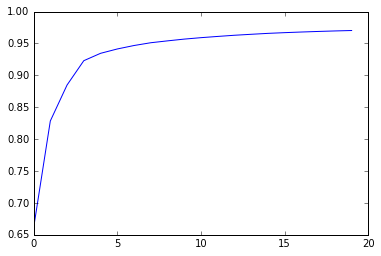

In [6]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_[:e]))
print np.cumsum(pca1.explained_variance_ratio_[:e])

## Verify that the Spark VecStat PCA matches

In [7]:
eigs1 = {}
with open('d11_2010_01_m1_eigs'+str(e)+'_1.pkl', 'rb') as pfile:
    eigs1['eigvalues'] = pickle.load(pfile)
    eigs1['eigvectors'] = pickle.load(pfile)
    eigs1['mean'] = pickle.load(pfile)

In [8]:
spk1_explained_variance_ratio_ = []
for i in xrange(shape(eigs1['eigvalues'])[0]):
    spk1_explained_variance_ratio_.append(eigs1['eigvalues'][i] / sum(eigs1['eigvalues']))

[ 0.66042599  0.82847531  0.88487005  0.92302414  0.93457027  0.94139338
  0.94681672  0.95117139  0.95411138  0.95687356  0.95912442  0.96106445
  0.96289795  0.96441637  0.96586702  0.96699186  0.96798326  0.9688762
  0.96966428  0.97034033]


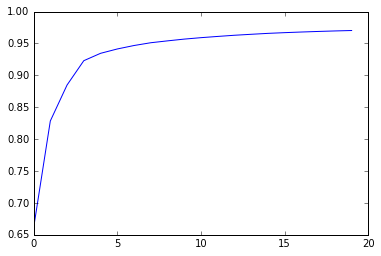

In [9]:
plt.plot(np.cumsum(spk1_explained_variance_ratio_[:20]))
print np.cumsum(spk1_explained_variance_ratio_[:20])

In [10]:
shape(eigs1['eigvectors'])

(19, 1440)

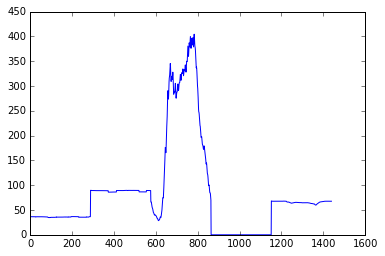

In [11]:
plt.plot(eigs1['mean'])

In [12]:
shape(data1.iloc[:,3:]), shape(eigs1['eigvectors'][:2].T)

((19654, 1440), (1440, 2))

In [13]:
vec2proj1 =  np.dot(data1.iloc[:,3:], eigs1['eigvectors'][:2].T)

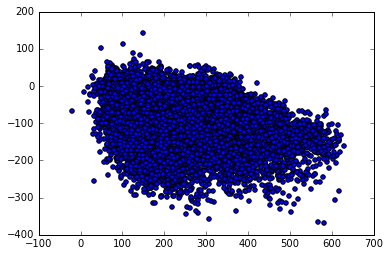

In [14]:
plt.scatter([x[0] for x in vec2proj1], [y[1] for y in vec2proj1])

## Redo w/ Samples and Observed Remove

In [15]:
data2 = pd.read_csv('d11_2010_01_m1_pivot2.csv', header=None)

In [16]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,857,858,859,860,861,862,863,864,865,866
0,1118076,2010,21,60,61,53,62,58,56,42,...,67.1,67.2,66.6,66.7,67.3,66.2,66.5,65.9,66.6,66.9
1,1119871,2010,25,80,83,103,103,81,93,56,...,68.5,66.9,67.6,67.6,67.4,67.0,67.8,68.2,67.7,67.7
2,1119817,2010,6,68,56,58,48,50,64,52,...,69.3,69.7,69.6,70.0,69.3,70.0,69.5,70.3,69.7,69.5
3,1108434,2010,6,56,55,67,65,66,49,53,...,68.0,69.3,68.3,68.3,67.1,68.5,67.8,68.5,68.2,67.5
4,1108689,2010,9,92,81,97,84,97,57,64,...,66.8,67.6,67.2,66.8,67.0,67.4,68.2,67.2,67.6,67.5


In [17]:
pca2 = PCA()
pca2.fit(data2.iloc[:,3:])

PCA(copy=True, n_components=None, whiten=False)

[ 0.7060019   0.88593643  0.92742079  0.94049957  0.94811766  0.95394076
  0.95745671  0.95998943  0.96221613  0.96389192  0.96549473  0.9667451
  0.9678317   0.96878544  0.96952015  0.9702342   0.97084923  0.97143549
  0.97199563  0.97249572]


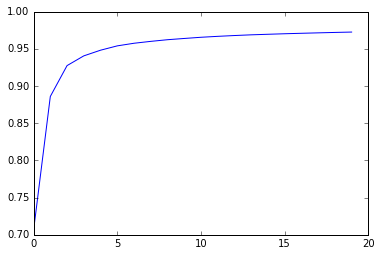

In [18]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_[:e]))
print np.cumsum(pca2.explained_variance_ratio_[:e])

In [19]:
eigs2 = {}
with open('d11_2010_01_m1_eigs'+str(e)+'_2.pkl', 'rb') as pfile:
    eigs2['eigvalues'] = pickle.load(pfile)
    eigs2['eigvectors'] = pickle.load(pfile)
    eigs2['mean'] = pickle.load(pfile)

In [20]:
spk2_explained_variance_ratio_ = []
for i in xrange(shape(eigs2['eigvalues'])[0]):
    spk2_explained_variance_ratio_.append(eigs2['eigvalues'][i] / sum(eigs2['eigvalues']))

[ 0.7060019   0.88593643  0.92742079  0.94049957  0.94811766  0.95394076
  0.95745671  0.95998943  0.96221613  0.96389192  0.96549473  0.9667451
  0.9678317   0.96878544  0.96952015  0.9702342   0.97084923  0.97143549
  0.97199563  0.97249572]


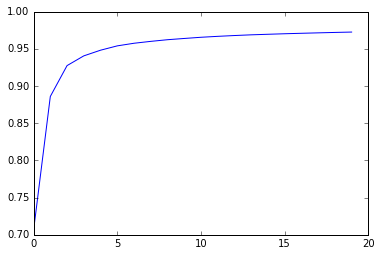

In [21]:
plt.plot(np.cumsum(spk2_explained_variance_ratio_[:20]))
print np.cumsum(spk2_explained_variance_ratio_[:20])

In [22]:
shape(eigs2['eigvectors'])

(19, 864)

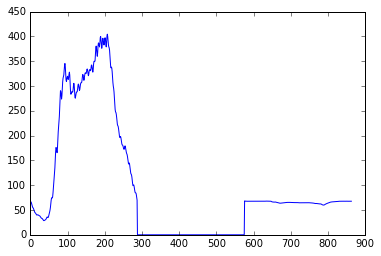

In [23]:
plt.plot(eigs2['mean'])

In [24]:
shape(data2.iloc[:,3:]), shape(eigs2['eigvectors'][:2].T)

((19654, 864), (864, 2))

In [25]:
vec2proj2 =  np.dot(data2.iloc[:,3:], eigs2['eigvectors'][:2].T)

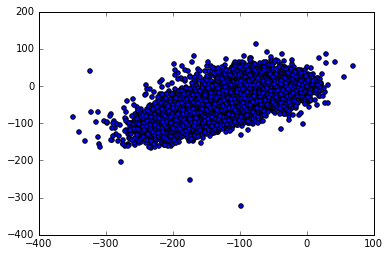

In [26]:
plt.scatter([x[0] for x in vec2proj2], [y[1] for y in vec2proj2])